# Comparisons against template

Get some baselines by comparing gene ranking of:
* Template experiment vs Crow et al
* Template experiment vs SOPHIE

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ponyo import utils
from generic_expression_patterns_modules import process, stats, ranking

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
local_dir = params["local_dir"]
project_id = params["project_id"]
dataset_name = params["dataset_name"]

In [4]:
# Read in summary results
gene_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}_noise_model.tsv"
)

gene_summary = pd.read_csv(gene_summary_filename, sep="\t", index_col=0, header=0)

In [5]:
gene_summary.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
PAX7,PAX7,5.950002e-13,17569.0,10.694069,10.694069,0.999995,16956.0,95.499606,0.0,1.348480,0.916280,25,10.199488
PRAME,PRAME,2.959850e-15,17568.0,8.664896,8.664896,0.999976,17594.0,99.093162,0.0,2.196133,0.852890,25,7.584525
SLCO1B3,SLCO1B3,5.291828e-04,17567.0,8.325529,8.325529,0.999995,14245.0,80.229807,0.0,0.784926,0.644249,25,11.704487
KCNC2,KCNC2,1.983864e-10,17566.0,8.230783,8.230783,0.999995,13040.0,73.442604,0.0,0.790583,0.599183,25,12.417245
HOTAIR,HOTAIR,3.115155e-10,17565.0,8.228355,8.228355,0.999995,10762.0,60.611693,0.0,0.633447,0.465144,25,16.328074


## Template vs Crow et al

In [6]:
# Scale ranking of genes in template experiment
gene_summary_scaled = ranking.scale_reference_ranking(gene_summary, "Rank (Real)")

gene_summary_scaled.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
PAX7,PAX7,5.950002e-13,100.000000,10.694069,10.694069,0.999995,16956.0,95.499606,0.0,1.348480,0.916280,25,10.199488
PRAME,PRAME,2.959850e-15,99.994308,8.664896,8.664896,0.999976,17594.0,99.093162,0.0,2.196133,0.852890,25,7.584525
SLCO1B3,SLCO1B3,5.291828e-04,99.988616,8.325529,8.325529,0.999995,14245.0,80.229807,0.0,0.784926,0.644249,25,11.704487
KCNC2,KCNC2,1.983864e-10,99.982923,8.230783,8.230783,0.999995,13040.0,73.442604,0.0,0.790583,0.599183,25,12.417245
HOTAIR,HOTAIR,3.115155e-10,99.977231,8.228355,8.228355,0.999995,10762.0,60.611693,0.0,0.633447,0.465144,25,16.328074


r = 0.16216051309488058
p = 2.049917854001632e-101
ci_low = 0.14703546843346946
ci_high = 0.17668232832101868


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


,Percentile (simulated),DE_Prior_Rank,Gene_Name
Gene_Order,,,
15947,6.471781,17.301372,FAU
8197,62.566182,57.243466,CDC20B
974,88.081559,94.926705,SFN
18128,58.944463,5.456727,OR2B6
8656,29.914385,54.848975,SLC38A10


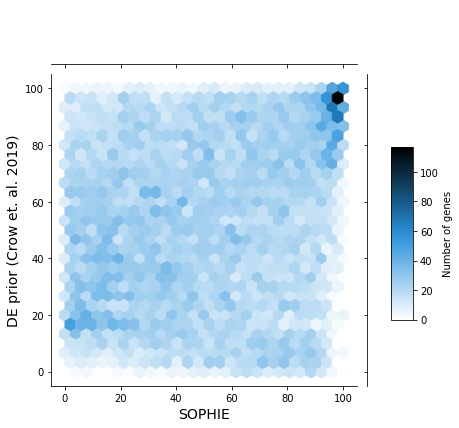

In [8]:
# Get scaled Crow et al ranking from summary df
DE_prior_filename = params["reference_gene_filename"]
ref_gene_col = params["reference_gene_name_col"]
ref_rank_col = params["reference_rank_col"]

figure_filename = "tmp.svg"

corr, shared_ranking = ranking.compare_gene_ranking(
    gene_summary, DE_prior_filename, ref_gene_col, ref_rank_col, figure_filename
)
shared_ranking.head()

In [10]:
# Merge template and Crow et al ranking using gene names
gene_summary_merged = gene_summary_scaled.merge(
    shared_ranking, left_on="Gene ID", right_on="Gene_Name"
)

gene_summary_merged.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated)_x,Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Percentile (simulated)_y,DE_Prior_Rank,Gene_Name
0,PAX7,5.950002e-13,100.000000,10.694069,10.694069,0.999995,16956.0,95.499606,0.0,1.348480,0.916280,25,10.199488,95.499606,58.367677,PAX7
1,PRAME,2.959850e-15,99.994308,8.664896,8.664896,0.999976,17594.0,99.093162,0.0,2.196133,0.852890,25,7.584525,99.093162,83.462883,PRAME
2,SLCO1B3,5.291828e-04,99.988616,8.325529,8.325529,0.999995,14245.0,80.229807,0.0,0.784926,0.644249,25,11.704487,80.229807,87.735406,SLCO1B3
3,KCNC2,1.983864e-10,99.982923,8.230783,8.230783,0.999995,13040.0,73.442604,0.0,0.790583,0.599183,25,12.417245,73.442604,7.493870,KCNC2
4,HOTAIR,3.115155e-10,99.977231,8.228355,8.228355,0.999995,10762.0,60.611693,0.0,0.633447,0.465144,25,16.328074,60.611693,67.875215,HOTAIR


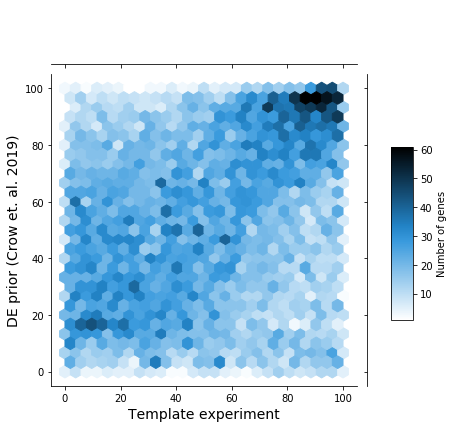

In [15]:
# Make joint plot
fig = sns.jointplot(
    data=gene_summary_merged,
    x="Rank (Real)",
    y=ref_rank_col,
    kind="hex",
    marginal_kws={"color": "white", "edgecolor": "white"},
)

cbar_ax = fig.fig.add_axes([0.9, 0.25, 0.05, 0.4])  # x, y, width, height
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("Number of genes")

fig.set_axis_labels(
    "Template experiment",
    "DE prior (Crow et. al. 2019)",
    fontsize=14,
    fontname="Verdana",
)

* Looks like template experiment already expresses generic genes, so adding a small amount of noise (Normal(0,2)) will still find these generic results.

* This generic pattern does seem to be disrupted when we add enough noise (Normal(0.1000))

* This is expected, given that generic genes are "generic" because they are found across many experiments

## Template vs SOPHIE

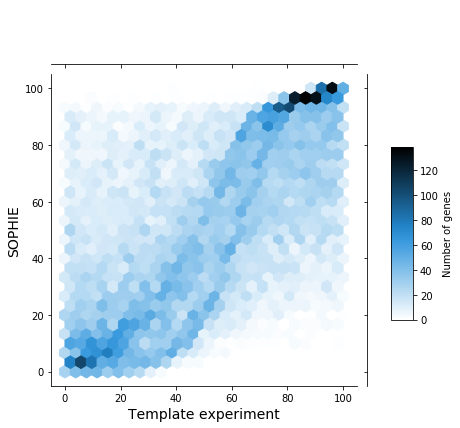

In [16]:
# Make joint plot
fig = sns.jointplot(
    data=gene_summary_merged,
    x="Rank (Real)",
    y="Percentile (simulated)_x",
    kind="hex",
    marginal_kws={"color": "white", "edgecolor": "white"},
)

cbar_ax = fig.fig.add_axes([0.9, 0.25, 0.05, 0.4])  # x, y, width, height
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("Number of genes")

fig.set_axis_labels("Template experiment", "SOPHIE", fontsize=14, fontname="Verdana")

There is a distinct sigmoid shape -- highly changed genes in the template experiment are pushed to having a higher rank in SOPHIE while low/unchanged genes in template experiment are pushed to having a low rank in SOPHIE

SOPHIE pushes genes to extreme ranks -- a characteristic of the VAE